In [ ]:
# Importing required dependencies
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import BernoulliNB

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
print("I'm running")

In [2]:
# Custom functions
def ClusterIndices(cluster_number, label):
    print (np.where(label == cluster_number)[0])
    
def ClusterValues(cluster_number, label):
    print (test_feature.iloc[np.where(label == cluster_number)[0],:].values)
    
def accuracy_score(matrix):
    tp_sum = 0
    score = 0
    np.array(matrix)
    for i in range(len(matrix)):
        tp_sum += matrix[i][i]
        
    score = (tp_sum / np.sum(matrix)) * 100
    return score

def Predict(vector):
    dist_list = []
    for i in range(len(centroids)):
        distance = [(a - b)**2 for a, b in zip(vector, centroids[i])]
        distance = math.sqrt(sum(distance))
        dist_list.append(distance)
        
    nos = len(np.where(labels == dist_list.index(min(dist_list)))[0]) # Number of samples

    print("Prediction Analysis:")
    print("==================================")
    print("Cluster number: " + str(dist_list.index(min(dist_list)) + 1))
    print("Cluster label: " + targets[dist_list.index(min(dist_list))])
    print("Number of samples: " + str(nos))
    print("----------------------------------")
    print("Summary:")
    print("Given observations seems to have larger amount of similarities with the samples of cluster " + 
          str(dist_list.index(min(dist_list)) + 1) + ". Preliminary diagnosis should be considered as suggested.")
    print("==================================")
    
def knn(train_data, test_data, train_label, test_label):
    for i in range(5,51,5):
        knn_e = KNeighborsClassifier(n_neighbors=i)
        knn_e.fit(train_data, train_label)
        pred_label = knn_e.predict(test_data)
        print("======================================================")
        print("\nReport using k=", i, ":\n")
        matrix = confusion_matrix(test_label, pred_label)
        print(matrix)
        print(classification_report(test_label, pred_label))
        accuracy = accuracy_score(matrix)
        print("\nAccuracy score: ", "%.2f" % accuracy, "%")
        print("======================================================")

In [3]:
train_data = pd.read_csv("disease_train_data.csv")
test_data = pd.read_csv("disease_test_data.csv")

In [4]:
# Spliting features and labels
train_feature = train_data.drop(["Class"], axis=1)
train_target = train_data.iloc[:,-1]
test_feature = test_data.drop(["Class"], axis=1)
test_target = test_data.iloc[:,-1]

In [5]:
# Finding names of unique targets
train_targets = train_data['Class'].unique().tolist()
test_targets = test_data['Class'].unique().tolist()

# Evaluation using k-Means

In [80]:
# KMeans clustering
kmeans = KMeans(n_clusters=len(test_targets), random_state=100)
kmeans.fit(test_feature)
labels = kmeans.predict(test_feature) # K-means prediction
centroids = kmeans.cluster_centers_

In [81]:
# Fixing numeric labels into category
labels_df = pd.DataFrame(labels,columns=["Predicted_labels"])
num_to_fix_cat = {5 : 'Anemia', 17 : 'Angina', 7 : 'Asthma', 14 : 'Bronchiolitis', 12 : 'Chicken pox', 2 : 'Dengue fever', 10 : 'Diabetes Mellitus', 
              8 : 'Diarrhoea', 4 : 'Jaundice', 13 : 'Leukemia', 1 : 'Malaria', 6 : 'Peptic Ulcer', 11 : 'Pneumonia', 
              9 : 'Rheumatic Fever', 0 : 'Scurvy', 16 : 'Stroke', 3 : 'Tuberculosis', 15 : 'Typhoid'}
labels_category = pd.DataFrame(labels_df["Predicted_labels"].replace(num_to_fix_cat))

In [82]:
labels_list = []

for i in range(labels_df.shape[0]):
    labels_list.append(labels_df.values[i][0])
    
custom_label = (np.array(labels_list)).astype('int64')

In [83]:
# Reducing data dimensions using t-SNE
tsne = TSNE(n_components=2,perplexity=30,learning_rate=100,random_state=100)
embedded_data = tsne.fit_transform(test_feature)
dtp = pd.DataFrame(embedded_data, columns= ["embedded_feature_01", "embedded_feature_02"])

In [84]:
# Printing cluster analytics
print("Cluster analytics:")
for cn in range(len(centroids)):
    print("==================================")
    print("Cluster " + str(cn+1) + " indices:")
    ClusterIndices(cn, custom_label) # Returns index of data points in a cluster
    print("----------------------------------")
    print("Cluster " + str(cn+1) + " values:")
    ClusterValues(cn, custom_label) # Returns datapoints of a cluster
    print("==================================")

Cluster analytics:
Cluster 1 indices:
[1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022
 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036
 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050
 1051 1052 1053 1054 1055 1056 1057 1058 1059]
----------------------------------
Cluster 1 values:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Cluster 2 indices:
[584 585 586 591 592 593 594 595 596 597 598 599 600 601 602 607 608 609
 610 611 612 613 614 615 616 617 618 639 640 641 642 643 644 645 646 647
 648 649 650 655 656 657 658 659 660 661 662 663 664 665 666 671 672 673
 674 675 676 677 678 679 680 681 682 703 704 705 706 707 708 709 710 711
 712 713 714 719 720 721 722 723 724 725 726 727 728 729 730 735 736 737
 738 739 740 741 742 743 744 745 746 767 768 769 770 771 772 773 774 775
 776 777 778 783 784 785 786 787 788 789 790 791 792 793 794 799 800 801

In [85]:
# Preparing final dataframe of important columns to plot data
ploting_data = pd.DataFrame(pd.concat([dtp, labels_category, test_target], sort=False, ignore_index=True, axis=1).values,
                            columns=["embedded_feature_01", "embedded_feature_02", "Predicted_labels", "Original_labels"])

In [86]:
# Printing result analytics
print("Result analytics:")
# c_matrix = confusion_matrix(test_target_num, custom_label)
c_matrix = confusion_matrix(test_target, labels_category)

print("==================================")
print("Confusion matrix:")
print(c_matrix)
print("----------------------------------")
print("Classification report:")
print(classification_report(test_target, labels_category))
print("Accuracy score: " + str("%.2f" % (accuracy_score(c_matrix))) + " %")
print("==================================")

Result analytics:
Confusion matrix:
[[101   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 144   0  48   0   0  64   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0   0   0   0   0   0   0   

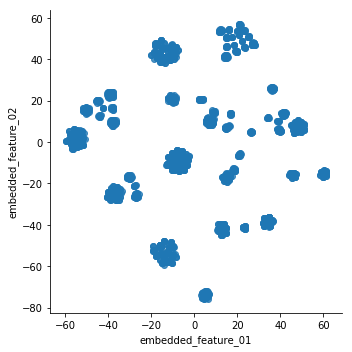

In [87]:
# Ploting(scatter plot) raw datapoints according to original dataset
sns.lmplot(x="embedded_feature_01",y="embedded_feature_02",data=ploting_data,fit_reg=False)
# plt.savefig("Raw_datapoints.png")

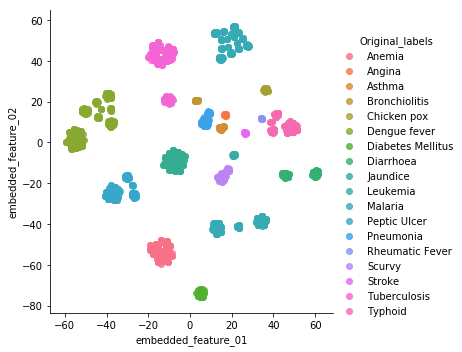

In [88]:
# Ploting(scatter plot) original clusters according to original dataset
sns.lmplot(x="embedded_feature_01",y="embedded_feature_02",data=ploting_data,fit_reg=False,hue="Original_labels")
# plt.savefig("Original_datapoints.png")

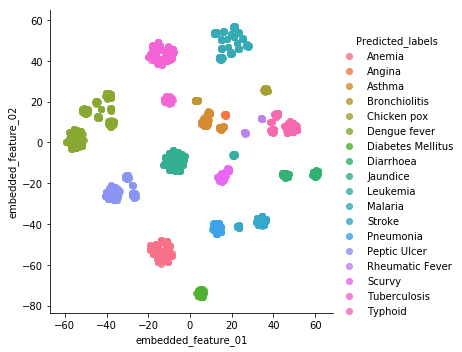

In [89]:
# Ploting(scatter plot) kmeans predicted clusters
sns.lmplot(x="embedded_feature_01",y="embedded_feature_02",data=ploting_data,fit_reg=False,hue="Predicted_labels")
# plt.savefig("Predicted_datapoints.png")

# Prediction using kNN

In [90]:
knn(train_feature, test_feature, train_target, test_target)


Report using k= 5 :

[[101   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 256   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  50   0   0   0   0   0]
 [ 

c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

           Anemia       1.00      1.00      1.00       101
           Angina       1.00      1.00      1.00        11
           Asthma       1.00      1.00      1.00        19
    Bronchiolitis       1.00      0.29      0.44        14
      Chicken pox       1.00      1.00      1.00        22
     Dengue fever       1.00      1.00      1.00       202
Diabetes Mellitus       1.00      1.00      1.00        37
        Diarrhoea       1.00      1.00      1.00        61
         Jaundice       1.00      1.00      1.00       103
         Leukemia       1.00      1.00      1.00        14
          Malaria       1.00      1.00      1.00       256
     Peptic Ulcer       1.00      1.00      1.00       111
        Pneumonia       0.83      1.00      0.91        50
  Rheumatic Fever       0.00      0.00      0.00         8
           Scurvy       1.00      1.00      1.00        51
           Stroke       1.00      1.00      1.00       

c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




Accuracy score:  97.34 %

Report using k= 40 :

[[101   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   5   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5   0   0   0   0   0   0   0   0   0  14   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0  13   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22]
 [  0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 256   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Report using k= 50 :

[[101   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22]
 [  0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  10   0   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 256   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  50   0   0   0   0   0]
 [

c:\users\intelligent\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Prediction using Naive Bayes

In [6]:
# Multinomial Naive Bayes Classification
mnb = MultinomialNB()
mnb.fit(train_feature, train_target)
mnb_predict = mnb.predict(test_feature)

In [7]:
# Printing result analytics
print("Result analytics:")
c_matrix = confusion_matrix(test_target, mnb_predict)

print("==================================")
print("Classification report:")
print(classification_report(test_target, mnb_predict))
print("Accuracy score: " + str("%.2f" % (accuracy_score(c_matrix))) + " %")
print("==================================")

Result analytics:
Classification report:
                   precision    recall  f1-score   support

           Anemia       1.00      1.00      1.00       101
           Angina       1.00      1.00      1.00        11
           Asthma       1.00      1.00      1.00        19
    Bronchiolitis       1.00      1.00      1.00        14
      Chicken pox       1.00      1.00      1.00        22
     Dengue fever       1.00      1.00      1.00       202
Diabetes Mellitus       1.00      1.00      1.00        37
        Diarrhoea       1.00      1.00      1.00        61
         Jaundice       1.00      1.00      1.00       103
         Leukemia       1.00      1.00      1.00        14
          Malaria       1.00      1.00      1.00       256
     Peptic Ulcer       1.00      1.00      1.00       111
        Pneumonia       1.00      1.00      1.00        50
  Rheumatic Fever       1.00      1.00      1.00         8
           Scurvy       1.00      1.00      1.00        51
           Str

In [9]:
# Gaussian Naive Bayes Classification
gnb = GaussianNB()
gnb.fit(train_feature, train_target)
gnb_predict = gnb.predict(test_feature)

In [10]:
# Printing result analytics
print("Result analytics:")
c_matrix = confusion_matrix(test_target, gnb_predict)

print("==================================")
print("Classification report:")
print(classification_report(test_target, gnb_predict))
print("Accuracy score: " + str("%.2f" % (accuracy_score(c_matrix))) + " %")
print("==================================")

Result analytics:
Classification report:
                   precision    recall  f1-score   support

           Anemia       1.00      1.00      1.00       101
           Angina       1.00      1.00      1.00        11
           Asthma       1.00      1.00      1.00        19
    Bronchiolitis       1.00      1.00      1.00        14
      Chicken pox       1.00      1.00      1.00        22
     Dengue fever       1.00      1.00      1.00       202
Diabetes Mellitus       1.00      1.00      1.00        37
        Diarrhoea       1.00      1.00      1.00        61
         Jaundice       1.00      1.00      1.00       103
         Leukemia       1.00      1.00      1.00        14
          Malaria       1.00      1.00      1.00       256
     Peptic Ulcer       1.00      1.00      1.00       111
        Pneumonia       1.00      1.00      1.00        50
  Rheumatic Fever       1.00      1.00      1.00         8
           Scurvy       1.00      1.00      1.00        51
           Str

In [11]:
# Bernoulli Naive Bayes Classification
bnb = BernoulliNB(binarize=0.1)
bnb.fit(train_feature, train_target)
bnb_predict = bnb.predict(test_feature)

In [12]:
# Printing result analytics
print("Result analytics:")
c_matrix = confusion_matrix(test_target, bnb_predict)

print("==================================")
print("Classification report:")
print(classification_report(test_target, bnb_predict))
print("Accuracy score: " + str("%.2f" % (accuracy_score(c_matrix))) + " %")
print("==================================")

Result analytics:
Classification report:
                   precision    recall  f1-score   support

           Anemia       1.00      1.00      1.00       101
           Angina       1.00      1.00      1.00        11
           Asthma       1.00      1.00      1.00        19
    Bronchiolitis       1.00      1.00      1.00        14
      Chicken pox       1.00      1.00      1.00        22
     Dengue fever       1.00      1.00      1.00       202
Diabetes Mellitus       1.00      1.00      1.00        37
        Diarrhoea       1.00      1.00      1.00        61
         Jaundice       1.00      1.00      1.00       103
         Leukemia       1.00      1.00      1.00        14
          Malaria       1.00      1.00      1.00       256
     Peptic Ulcer       1.00      1.00      1.00       111
        Pneumonia       1.00      1.00      1.00        50
  Rheumatic Fever       1.00      1.00      1.00         8
           Scurvy       1.00      1.00      1.00        51
           Str